# Single Link

## 1.Preparação do ambiente

In [1]:
# Importando bibliotecas utilizadas
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt, pow
from datetime import datetime
from time import sleep

%matplotlib inline

In [24]:
inicio = datetime.now()

sleep(2)

fim = datetime.now()

In [25]:
fim-inicio

datetime.timedelta(seconds=2, microseconds=1189)

In [2]:
# Lendo o conjunto de dados
df1 = pd.read_csv('datasets/c2ds1-2sp.txt', sep='\t', index_col='sample_label')
df1.head()

,d1,d2
sample_label,,
c2sp1s1,10.500000,9.000000
c2sp1s2,10.567170,9.268445
c2sp1s3,8.275320,11.382210
c2sp1s4,8.227458,11.377640
c2sp1s5,8.179511,11.372110


## 2.Algoritmo

### 2.1.Pseudo código

``` python

# Refazer pseudo código

```

### 2.2.Implementação do Algoritmo

In [3]:
class Distancia:
    def __init__(self, distancia, objetos):
        self.distancia = distancia
        self.objetos = objetos
        
    def __str__(self):
        return "{}, {}".format(self.distancia, self.objetos)
    
    def __repr__(self):
        return repr((self.distancia, self.objetos))

In [4]:
#Distancia Euclidiana
def distancia_euclidiana(p1, p2):
    distancia = sqrt(pow((p1[0] - p2[0]), 2) + pow((p1[1] - p2[1]), 2))
    return distancia

In [5]:
# Distancia com o método sorted
def calcular_distancias(d1, d2, numero_de_objetos):
    lista = []
    for i in range(numero_de_objetos):
        for j in range(i+1, numero_de_objetos):
            distancia = distancia_euclidiana([d1[i], d2[i]], [d1[j], d2[j]])
            objetos = [i, j]
            
            d = Distancia(distancia, objetos)
            lista.append(d)

    nova_lista = sorted(lista, key= lambda distancia: distancia.distancia)        
    return nova_lista


In [6]:
def iniciliza_clusters(numero_de_objetos):
    clusters = []
    for i in range(numero_de_objetos):
        clusters.append(i)

    return clusters    

In [7]:
def agrupa_clusters(clusters, clusters_mais_proximos):
    obj1, obj2 = clusters_mais_proximos
    cluster1 = clusters[obj1]
    cluster2 = clusters[obj2]
    
    if cluster1 == cluster2:
        return False
    
    if cluster1 < cluster2:
        menor = cluster1
        maior = cluster2
    else:
        menor = cluster2
        maior = cluster1
        
    for i in range(len(clusters)):
        if clusters[i] == maior:
            clusters[i] = menor
    
    return True

In [8]:
def single_link(dataset, k_min, k_max):
    numero_de_objetos = len(dataset)
    clusters = iniciliza_clusters(numero_de_objetos)
    fila_com_distancias = calcular_distancias(dataset['d1'], dataset['d2'], numero_de_objetos)

    
    i = numero_de_objetos
    while i > k_min:
        objetos = fila_com_distancias.pop(0)
        if agrupa_clusters(clusters, objetos.objetos):
            i -= 1
    
    return clusters

## 3.Resultados

### 3.1.Teste inicial do algoritmo

In [9]:
df_test = df1[:10].copy()

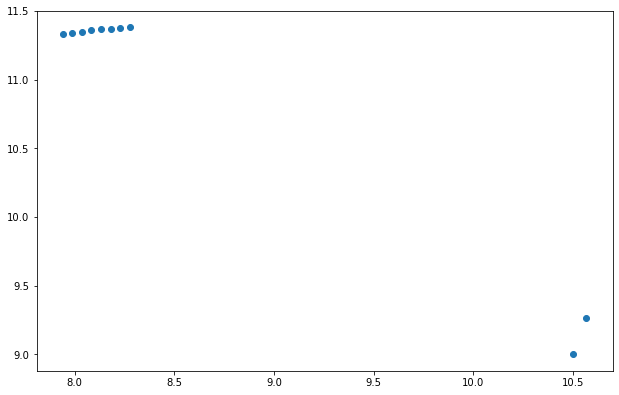

In [16]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])

plt.scatter(x=df_test['d1'], y=df_test['d2'])
plt.show()

In [14]:
lista_de_clusters = single_link(df_test, 2, 15)


[2, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2 3
[3, 4]
[0, 1, 2, 2, 4, 5, 6, 7, 8, 9]
3 4
[4, 5]
[0, 1, 2, 2, 2, 5, 6, 7, 8, 9]
4 5
[5, 6]
[0, 1, 2, 2, 2, 2, 6, 7, 8, 9]
5 6
[6, 7]
[0, 1, 2, 2, 2, 2, 2, 7, 8, 9]
6 7
[7, 8]
[0, 1, 2, 2, 2, 2, 2, 2, 8, 9]
7 8
[8, 9]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 9]
8 9
[2, 4]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
2 4
[3, 5]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
3 5
[4, 6]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
4 6
[5, 7]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
5 7
[6, 8]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
6 8
[7, 9]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
7 9
[2, 5]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
2 5
[3, 6]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
3 6
[4, 7]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
4 7
[5, 8]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
5 8
[6, 9]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
6 9
[2, 6]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
2 6
[3, 7]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
3 7
[4, 8]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
4 8
[5, 9]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
5 9
[2, 7]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2]
2 7
[3, 8]
[0, 1, 2, 2, 2, 2, 2, 2, 2,

In [15]:
lista_de_clusters

[0, 0, 2, 2, 2, 2, 2, 2, 2, 2]

### 3.2 Testes reais

In [9]:
inicio = datetime.now()
lista_de_clusters = single_link(df1, 2, 15)
fim = datetime.now()

In [10]:
fim - inicio

datetime.timedelta(seconds=28, microseconds=436101)

In [12]:
pd.Series(lista_de_clusters).unique()

array([  0, 500], dtype=int64)

In [13]:
df1['clusters'] = lista_de_clusters
df1.head()

,d1,d2,clusters
sample_label,,,
c2sp1s1,10.500000,9.000000,0
c2sp1s2,10.567170,9.268445,0
c2sp1s3,8.275320,11.382210,0
c2sp1s4,8.227458,11.377640,0
c2sp1s5,8.179511,11.372110,0


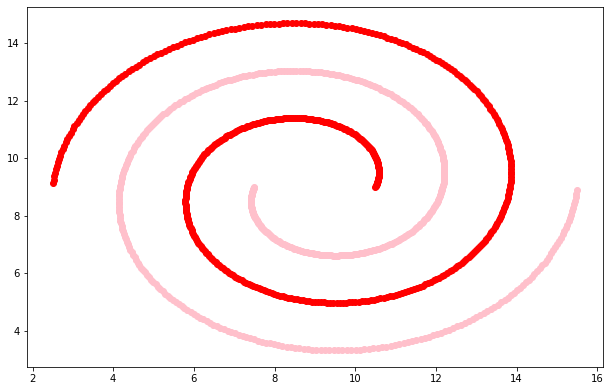

In [14]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])

lista = [0, 500]
cores = {0: "red", 500: "pink"}

for i in lista:
    temp = df1.query(f'clusters == {i}')
    plt.scatter(x=temp['d1'], y=temp['d2'], color=cores[i])
    
plt.show()